Problem:

In this project, we aim to build a predictive model to determine whether a hotel booking would be canceled, which is crucial for hotels as cancellations affect revenue and operational planning. The dataset contains a high number of features related to booking, such as lead time, deposit type, and special requests, which adds to the complexity of the model. The challenge lies in the data preprocessing steps, which include feature selection and engineering, handling missing values, and noise in the data. Additionally, we are going to train different models, evaluate their performance using the right metrics, and interpret the model by analyzing the most important features in the context of hotel booking cancellations.

### About Data

 - `hotel`:The datasets contains the booking information of two hotel. One of the hotels is a resort hotel and the other is a city
- `is_canceled`: Value indicating if the booking was canceled (1) or not (0).
- `lead_time`: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date.
- `arrival_date_year`: Year of arrival date
- `arrival_date_month`: Month of arrival date with 12 categories: “January” to “December”
- `arrival_date_week_number`: Week number of the arrival date
- `arrival_date_day_of_month`: Day of the month of the arrival date
- `stays_in_weekend_nights`: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- `stays_in_week_nights`: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel BO and BL/Calculated by
- `adults`: Number of adults
- `children`: Number of children
- `babies`: Number of babies
- `meal`: BB – Bed & Breakfast
- `country`: Country of origin.
- `market_segment`: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `distribution_channel`: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
- `is_repeated_guest`: Value indicating if the booking name was from a repeated guest (1) or not (0)
- `previous_cancellations`: Number of previous bookings that were cancelled by the customer prior to the current booking
- `previous_bookings_not_canceled`: Number of previous bookings not cancelled by the customer prior to the current booking
- `reserved_room_type`: Code of room type reserved. Code is presented instead of designation for anonymity reasons
- `assigned_room_type`: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

- `booking_changes`:Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

- `deposit_type`: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

- `agent`: ID of the travel agency that made the booking

- `company`: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

- `days_in_waiting_list`: Number of days the booking was in the waiting list before it was confirmed to the customer

- `customer_type`: Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

- `adr`: Average Daily Rate (Calculated by dividing the sum of all lodging transactions by the total number of staying nights)

- `required_car_parking_spaces`: Number of car parking spaces required by the customer

- `total_of_special_requests`: Number of special requests made by the customer (e.g. twin bed or high floor)

- `reservation_status`: Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why

 - `reservation_status_date`: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

- `name`: Name of the Guest

- `email`: Email (Not Real)

- `phone-number`: Phone number (not real)

- `credit_card`: Credit Card Number (not Real)

<p style="background-color:red; color:white; padding:5px; text-align: center">
  Step 1 | Import Libraries
</p>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<p style="background-color:red; color:white; padding:5px; text-align: center">
  Step 2 | Read Dataset
</p>

In [2]:
df = pd.read_csv(r'C:\Users\parha\Documents\Data_Analysis_projects\Hotel_cancelation\hotel_booking.csv')

In [3]:
df.head(3)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734


<p style="background-color:red; color:white; padding:5px; text-align: center">
  Step 3 | Dataset Overview
</p>

In [4]:
def check_detail(dataframe):
    d = {'SHAPE': dataframe.shape,
        'COLUMNS': dataframe.columns,
        'INDEX': dataframe.index,
        'VALUE TYPES': dataframe.dtypes,
        'DUPLICATED VALUES': dataframe.duplicated().sum(),
        'NUMBER OF UNIQUE VALUES': dataframe.nunique(),
        'ANY MISSING VALUES': dataframe.isnull().values.any(),
        'MISSING VALUES': dataframe.isnull().sum(),
        'DESCRIBE.T': dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T}
    hashtags = '---------------------------'
    for key, val in d.items():
        print(f'{hashtags} {key} {hashtags}')
        print(val)
    print(f'{hashtags} {"LIST END"} {hashtags}')
   

check_detail(dataframe=df)

--------------------------- SHAPE ---------------------------
(119390, 36)
--------------------------- COLUMNS ---------------------------
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')
--------------------------- INDEX ---------------------------
RangeIndex(start=0, stop=1

Inferences:

 - Number of Entries: The dataset consists of 119,390 entries.

 - Columns: The dataset contains 36 columns, which represent various attributes related to hotel bookings.

- Data Types:

    - A majority of the columns, 16 to be precise, are of the object data type (often representing strings or categorical data).
    - 16 columns are of the int64 data type, representing integer values.
    - 4 columns are of the float64 data type, which typically denotes decimal values.

Missing Values:

 - The column children has 4 missing values.
- The column country has 488 missing values.
- The column agent has 16,340 missing values.
 - The column company has a significant number of missing values, totaling 112,593.
 
These missing values might need addressing, depending on the context of the analysis or the model we intend to build.

In [5]:
def grab_col_names(df):
    # Separate columns into categorical and numerical
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numerical_cols = df.select_dtypes(include=['number']).columns

    print(f'cat_col: {len(categorical_cols)}')
    print(f'num_col: {len(numerical_cols)}')

    return categorical_cols, numerical_cols

In [6]:
def identify_check(dataframe):
    print('-' * 80)
    print(f'Categorical : {categorical_cols}')
    print('-' * 80)
    print(f'Numerical : {numerical_cols}')


categorical_cols, numerical_cols = grab_col_names(df)
identify_check(df)

cat_col: 16
num_col: 20
--------------------------------------------------------------------------------
Categorical : Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date', 'name', 'email', 'phone-number',
       'credit_card'],
      dtype='object')
--------------------------------------------------------------------------------
Numerical : Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='o

<p style="background-color:red; color:white; padding:5px; text-align: center">
  Step 4 | Data Preprocessing
</p>

Data preprocessing is a crucial step in any machine learning project. It involves cleaning and transforming raw data into a format that can be understood by machine learning algorithms.

#### Step 4.1 | Feature Selection and Engineering
In the Feature Selection and Engineering step, we prepare the dataset for modeling by performing several crucial activities:

 1. Removing Directly Related Features: We remove features that are directly related to the target variable to prevent data leakage and ensure a fair evaluation of the model.

 2. Dropping Irrelevant Features: Next, we drop irrelevant features that do not provide any useful information for predicting the target variable.
 
 3. Engineering and Dropping High-Cardinality Features: We engineer some high-cardinality features to extract relevant information and then drop all high-cardinality features, including the ones from which we extracted information.
    
These activities help in reducing the dimensionality of the dataset, preventing data leakage, and creating new features that may provide additional information for the model.

### Step 4.1.1 | Remove Directly Related Features
Features like `reservation_status`, `reservation_status_date` and `assigned_room_type` are directly related to the target variable `is_canceled`, and including them in the model would result in data leakage. Removing these features is essential to build a predictive model that can genuinely forecast cancellations, rather than retrospectively label them:

### Step 4.1.1.1 | reservation_status
reservation_status is a categorical feature that indicates the current status of a reservation. It can have values like 'Canceled', 'Check-Out', and 'No-Show'. This feature is directly related to the target variable is_canceled for the following reasons:

 - If the reservation_status is 'Canceled', it implies that is_canceled should be 1.
 - Similarly, if the reservation_status is 'Check-Out', it implies that the booking was not canceled, and hence is_canceled should be 0.
 
Therefore, knowing the reservation_status directly gives us the value of the target variable, leading to data leakage if it is used as a feature in the model. So, it is important to remove this feature to build a model that can actually predict cancellations. Therefore, reservation_status is considered as an irrelevant feature and should be omitted.

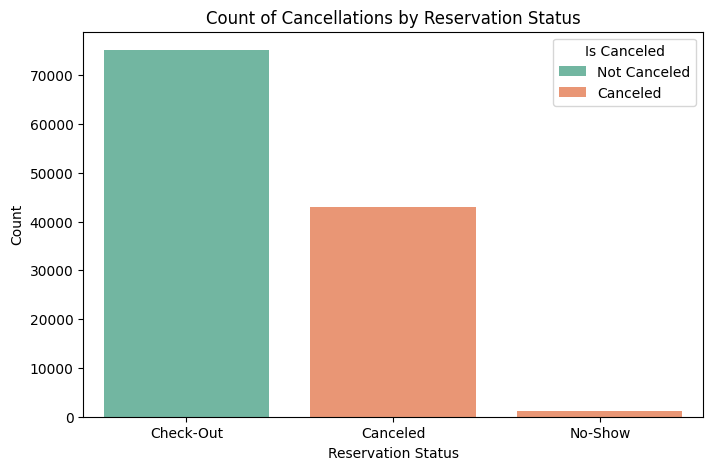

In [7]:
# Bivariate bar plot of 'is_canceled' vs 'reservation_status' with specified colors
plt.figure(figsize=(8, 5))
sns.countplot(x=df['reservation_status'],hue='is_canceled',data=df,palette="Set2")
plt.title('Count of Cancellations by Reservation Status')
plt.xlabel('Reservation Status')
plt.ylabel('Count')
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()

In [8]:
df.groupby('reservation_status')['is_canceled'].mean()

reservation_status
Canceled     1.0
Check-Out    0.0
No-Show      1.0
Name: is_canceled, dtype: float64

Inference:

It is clear from the plot that all the bookings with a reservation_status of "`Canceled`" or "`No-Show`" are indeed canceled (`is_canceled= 1`), and all the bookings with a reservation_status of "`Check-Out`" are not canceled (`is_canceled = 0`).

This confirms that the reservation_status feature is directly related to the is_canceled target variable and including it in the model would cause data leakage. Therefore, it is essential to remove the reservation_status feature before training the model.

In [9]:
# Drop the `reservation_status` feature
df = df.drop(['reservation_status'], axis=1)

Step 4.1.1.2 | reservation_status_date

reservation_status_date is a date feature that indicates the latest date at which the reservation_status was updated. This feature is directly related to the target variable is_canceled for the following reasons:

 - If a booking was canceled, the reservation_status_date would be the date on which the booking was canceled, implying that is_canceled should be 1.
 - On the other hand, if a booking was not canceled, the reservation_status_date would reflect the date of check-out, implying that is_canceled should be 0.
 
Therefore, the reservation_status_date can indirectly give us information about the value of the target variable, leading to data leakage if it is used as a feature in the model.

Let's investigate it precisely:

The reservation_status_date column is a date variable that represents the date of the last reservation status. Since it is a date, it will likely be in a '`YYYY-MM-DD`' format. We can extract some useful information from it:

- **Days_Difference**: Calculate the difference in days between the reservation_status_date and the arrival_date to create a new feature representing the number of days between the last reservation status and the arrival date.

In [10]:
# Convert 'reservation_status_date' to datetime format
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

# Extract Days_Difference from 'reservation_status_date'
df['reservation_status_days_difference'] = (df['reservation_status_date'] - pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + df['arrival_date_month'] + '-' + df['arrival_date_day_of_month'].astype(str))).dt.days

df[['reservation_status_days_difference']].head()

,reservation_status_days_difference
0,0
1,0
2,1
3,1
4,2


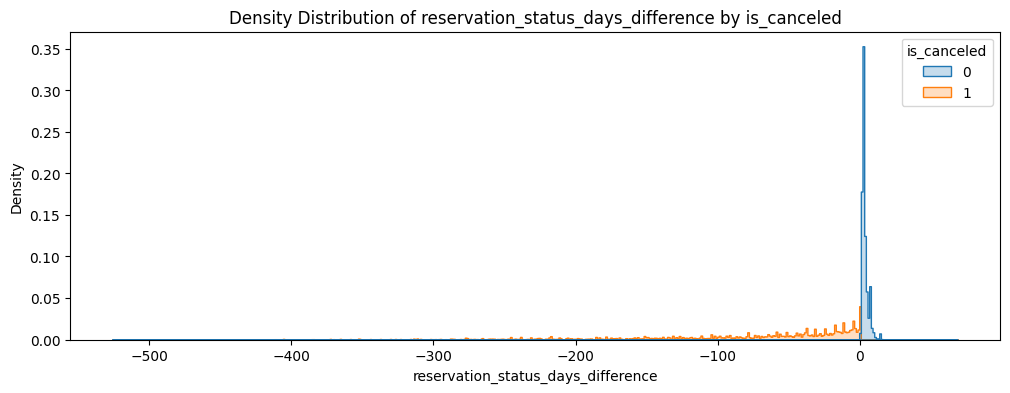

In [11]:
plt.figure(figsize=(12, 4))
sns.histplot(data=df, x="reservation_status_days_difference", hue="is_canceled", element="step", stat="density", common_norm=False)
plt.title('Density Distribution of reservation_status_days_difference by is_canceled')
plt.show()

In [12]:
# For positive values of reservation_status_days_difference
print("Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:\n")
print(df[df['reservation_status_days_difference'] > 0]['is_canceled'].value_counts())

# For negative values of reservation_status_days_difference
print("\n" + "-"*85)
print("\nDistribution of 'is_canceled' when 'reservation_status_days_difference' is negative:\n")
print(df[df['reservation_status_days_difference'] < 0]['is_canceled'].value_counts())

Distribution of 'is_canceled' when 'reservation_status_days_difference' is positive:

is_canceled
0    74460
Name: count, dtype: int64

-------------------------------------------------------------------------------------

Distribution of 'is_canceled' when 'reservation_status_days_difference' is negative:

is_canceled
1    42137
Name: count, dtype: int64


Inference:

The reservation_status_days_difference feature represents the number of days between the arrival date and the date at which the reservation status was last updated.

 - **Positive values** indicate that the reservation status was updated after the arrival date. Since is_canceled is always 0 for these rows, it suggests that these bookings were not canceled and the reservation status was updated (e.g., to 'Check-Out') after the guest arrived.

 - **Negative values** indicate that the reservation status was updated before the arrival date. Since is_canceled is always 1 for these rows, it suggests that these bookings were canceled before the arrival date.

This shows a clear relationship between the reservation_status_days_difference and the is_canceled feature. If a booking is canceled, the reservation status is usually updated before the arrival date. Conversely, if a booking is not canceled, the reservation status is usually updated after the arrival date.

Therefore, it is advisable to omit both the `reservation_status_date` and the `reservation_status_days_difference features` from the model. The latter was derived from the former, and both lead to data leakage, which could result in a model that does not generalize well to new data:

In [13]:
# Drop the 'reservation_status_date' and 'reservation_status_days_difference' columns
df = df.drop(['reservation_status_date', 'reservation_status_days_difference'], axis=1)

Step 4.1.1.3 | assigned_room_type

The `assigned_room_type` feature represents the type of room assigned to the guest. It is assigned `after the booking `is made, so it cannot be used to predict cancellations. Therefore, assigned_room_type is considered as an irrelevant feature and should be omitted:



In [14]:
df = df.drop(['assigned_room_type'], axis=1)


Step 4.1.2 | Drop Irrelevant Features

The `arrival_date_year` feature only includes a few years, and if we want to build a model that generalizes well to future data, it is advisable not to include features that could bias the model towards specific years. Therefore, it is reasonable to consider arrival_date_year as an irrelevant feature and it should be omitted.

In [15]:
df['arrival_date_year'].value_counts()


arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [16]:
# Drop the `arrival_date_year` feature
df = df.drop(['arrival_date_year'], axis=1)

Step 4.1.3 | Engineer and Drop High-Cardinality Features

Based on our findings regarding the features of the dataset from the previous steps, there are a number of categorical features which, due to the large number of categories (high cardinality), probably do not have specific information for the model and should be considered as irrelevant features and should be deleted. However, before that, we will check whether it is possible to extract useful information from the features before droping them:

In [17]:
# Create a dataframe with the number of unique categories and missing values for each high-cardinality feature
high_cardinality_features = ['country', 'agent', 'company', 'name', 'email', 'phone-number', 'credit_card']
unique_categories = df[high_cardinality_features].nunique()
missing_values = df[high_cardinality_features].isnull().sum()

# Combine the two series into a single dataframe
high_cardinality_df = pd.DataFrame({'Unique_Categories': unique_categories, 'Missing_Values': missing_values})

high_cardinality_df

,Unique_Categories,Missing_Values
country,177,488
agent,333,16340
company,352,112593
name,81503,0
email,115889,0
phone-number,119390,0
credit_card,9000,0


- **country**:
    - **Description**: Country of origin of the guest.
    - **Action**: We will remove this feature for ease of work due to the large number of categories. However, one way to handle this, if needed in future work, is to group the countries into regions (e.g., North America, Europe, Asia, etc.) or to keep only the top N most frequent countries and group the rest into an 'Other' category.
- **agent**:
    - **Description**: ID of the travel agent responsible for the booking.
    - **Action**: This feature has several unique categories, and some agents may only appear a few times in the dataset, which could cause overfitting. We could create a new feature representing the number of bookings made by each agent and then drop the original agent feature. However, this new feature may not be very meaningful because the number of bookings made by an agent may not be directly related to the cancellation rate. We will omit this feature.
- **company**:
    - **Description**: ID of the company responsible for the booking.
    **Action**: This feature has a high percentage of missing values and may not be very informative for predicting cancellations, so it may be better to drop it entirely.
- **name**:
    - **Description**: Guest's name.
    - **Action**: This feature has many unique categories and is not directly related to the cancellation rate. However, we could create a new feature representing the number of bookings made by each guest (based on the name) and then drop the original name feature. This new feature could be useful because repeat guests may have different cancellation behaviors than first-time guests.
- **email**:
    - **Description**: Guest's email address.
    - **Action**: Similar to the name feature, we could create a new feature representing the number of bookings made by each guest (based on the email) and then drop the original email feature. This new feature could capture the same information as the name feature, so it may be redundant to keep both. We will omit this feature.
- **phone-number**:
    - **Description**: Guest's phone number.
    - **Action**: This feature is like an identifier because all the rows have different phone-number values, so this feature has no information and we will omit this feature.
- **credit_card**:
    - **Description**: Last four digits of the guest's credit card.
    - **Action**: This feature may have many unique categories and is not directly related to the cancellation rate. It may be better to drop this feature entirely.
    
In summary, the country, agent, company, email, phone-number, and credit_card features will be omitted from the model due to their high cardinality, high percentage of missing values, or lack of direct relationship with the cancellation rate (is_canceled). The name feature will be engineered to create a new feature representing the number of bookings made by each guest, and then the original name feature will be dropped.

In [18]:
# Feature Engineering for 'name' feature
# Create a new feature representing the number of bookings made by each guest (based on the name)
df['number_of_bookings'] = df.groupby('name')['name'].transform('count')

# Drop the original 'name' feature and other high-cardinality features
df = df.drop(['name', 'country', 'agent', 'company', 'email', 'phone-number', 'credit_card'], axis=1)

df[['number_of_bookings']].head()

,number_of_bookings
0,1
1,2
2,3
3,1
4,1


Step 4.2 | Handle Missing Values

I am going to analyze the missing values in each column. If a column has a high percentage of missing values, it may be better to drop the column entirely. For columns with a small percentage of missing values, we can impute the missing values with the mean, median, or mode of the column, or use more advanced imputation techniques like K-nearest neighbors imputation:

In [19]:
# Calculate the missing values percentage in the original dataset
missing_values_percentage = (df.isnull().sum() / len(df)) * 100
missing_values_percentage[missing_values_percentage > 0]

children    0.00335
dtype: float64

Inference:

The children feature has a very low percentage of missing values (0.003350%) and is a numerical feature. Given the distribution of values in the children column, the majority of bookings have 0 children, which is a strong mode. Therefore, it would be reasonable to impute the missing values with 0 (the mode of the column). This approach is simple and will not introduce significant bias:

In [20]:
df['children'].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [21]:
# Impute missing values in 'children' column with 0
df['children'] = df['children'].fillna(0)

# Check if there are any missing values left in 'children' column
df['children'].isnull().sum()

0

Step 4.3 | Handle Noisy Data

Now let's analyze and handle the noisy data in the adr, adults, children, and babies columns as discussed in step 3.2:

In [22]:
# Analyze noisy data
noisy_data = {
    'adr':      df[df['adr'] < 0],
    'adults':   df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies':   df[df['babies'] == 10],
}

noisy_data_count = {key: len(value) for key, value in noisy_data.items()}
noisy_data_count

{'adr': 1, 'adults': 403, 'children': 1, 'babies': 1}

Inference:

We have identified some noisy data in the following features:

 - `adr`: There is 1 booking with a negative Average Daily Rate (ADR), which doesn't make sense and indicates a potential error or special case.

 - `adults`: There are 403 bookings with 0 adults, which could be a data entry error unless there are legitimate cases where only children or babies book a room.

 - `children`: There is 1 booking with 10 children, which seems unusually high for a single booking and could be a potential outlier or data entry error.

 - `babies`: There is 1 booking with 10 babies, which seems unusually high for a single booking and could be a potential outlier or data entry error.

In [23]:
# Replace negative adr with median of adr column
df.loc[df['adr'] < 0 , 'adr'] = df['adr'].median()

# Remove rows with 0 adult
df = df[df['adults'] != 0]

# Remove rows with 10 children or 10 babies
df = df[df['children'] != 10]
df = df[df['babies'] != 10]

# Reset the index
df.reset_index(drop=True, inplace=True)

# Check if the noisy data has been handled
noisy_data_handled = {
    'adr': df[df['adr'] < 0],
    'adults': df[df['adults'] == 0],
    'children': df[df['children'] == 10],
    'babies': df[df['babies'] == 10],
}

noisy_data_handled_count = {key: len(value) for key, value in noisy_data_handled.items()}
noisy_data_handled_count


{'adr': 0, 'adults': 0, 'children': 0, 'babies': 0}

Step 4.4 | Encode Categorical Variables

After analyzing the dataset, we can categorize the features into three groups:

 1. **No Encoding Needed**: These are the features that do not require any form of encoding because they are already in a numerical format that can be fed into a model.

 2. **One-Hot Encoding**: This is required for nominal variables, which are categorical variables without any intrinsic order. One-hot encoding converts each unique value of the feature into a separate column with a 1 or 0, indicating the presence of that value.
 
 3. **Label Encoding**: This is used for ordinal variables, which are categorical variables with a meaningful order. Label encoding assigns a unique integer to each category in the feature, maintaining the order of the values.

By categorizing the features into these groups, we can apply the appropriate encoding method to each feature, preparing the dataset for modeling.

In [24]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
booking_changes                     int64
deposit_type                       object
days_in_waiting_list                int64
customer_type                      object
adr                               float64
required_car_parking_spaces       

**No Encoding Needed:**

The following features do not require any encoding as they are either numerical, binary, or ordinal variables that have already been encoded as numbers:

 - is_canceled: This is the target variable and is binary.
 - lead_time: This is a numerical variable.
 - arrival_date_week_number: This is a numerical variable.
 - arrival_date_day_of_month: This is a numerical variable.
 - stays_in_weekend_nights: This is a numerical variable.
 - stays_in_week_nights: This is a numerical variable.
 - adults: This is a numerical variable.
 - children: This is a numerical variable.
 - babies: This is a numerical variable.
 - is_repeated_guest: This is a binary variable.
 - previous_cancellations: This is a numerical variable.
 - previous_bookings_not_canceled: This is a numerical variable.
 - booking_changes: This is a numerical variable.
 - days_in_waiting_list: This is a numerical variable.
 - adr: This is a numerical variable.
 - required_car_parking_spaces: This is a numerical variable.
 - total_of_special_requests: This is a numerical variable.
 - number_of_bookings: This is a numerical variable.

 **One-Hot Encoding:**

 The following features are nominal variables and should be one-hot encoded:

 - hotel: This is a nominal variable with two categories.
 - meal: This is a nominal variable.
 - market_segment: This is a nominal variable.
 - distribution_channel: This is a nominal variable.
 - reserved_room_type: This is a nominal variable.
 - deposit_type: This is a nominal variable.
 - customer_type: This is a nominal variable.

**Label Encoding:**

The following feature is an ordinal variable and should be label encoded:

 - arrival_date_month: This is an ordinal variable (months have a natural order).

In [25]:
# Convert 'arrival_date_month' to numerical values
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = df['arrival_date_month'].apply(lambda x: months.index(x) + 1)

# One-hot encode the specified columns
one_hot_cols = ['hotel', 'meal', 'market_segment', 'distribution_channel', 'reserved_room_type', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns=one_hot_cols, drop_first=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118985 entries, 0 to 118984
Data columns (total 48 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     118985 non-null  int64  
 1   lead_time                       118985 non-null  int64  
 2   arrival_date_month              118985 non-null  int64  
 3   arrival_date_week_number        118985 non-null  int64  
 4   arrival_date_day_of_month       118985 non-null  int64  
 5   stays_in_weekend_nights         118985 non-null  int64  
 6   stays_in_week_nights            118985 non-null  int64  
 7   adults                          118985 non-null  int64  
 8   children                        118985 non-null  float64
 9   babies                          118985 non-null  int64  
 10  is_repeated_guest               118985 non-null  int64  
 11  previous_cancellations          118985 non-null  int64  
 12  previous_booking

Step 4.5 | Check Imbalanced Data

If the target variable is_canceled is imbalanced, we may need to balance the dataset. Let's check:

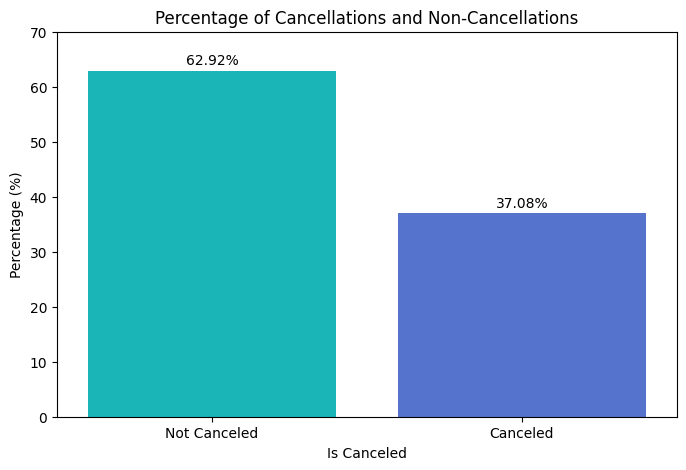

In [26]:
# Calculating the percentage of each class
percentage = df['is_canceled'].value_counts(normalize=True) * 100

# Plotting the percentage of each class
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=percentage.index, y=percentage, palette=['darkturquoise', 'royalblue'])
plt.title('Percentage of Cancellations and Non-Cancellations')
plt.xlabel('Is Canceled')
plt.ylabel('Percentage (%)')
plt.xticks(ticks=[0, 1], labels=['Not Canceled', 'Canceled'])
plt.yticks(ticks=range(0,80,10))

# Displaying the percentage on the bars
for i, p in enumerate(percentage):
    ax.text(i, p + 0.5, f'{p:.2f}%', ha='center', va='bottom')

plt.show()

Inference:

The bar plot shows the percentage of cancellations and non-cancellations in the dataset. Approximately 37.08% of the bookings were canceled, and 62.92% were not canceled. This indicates that there is some imbalance in the target variable, but it is not highly imbalanced. Generally, a dataset is considered highly imbalanced if one class represents over 80-90% of the data. In this case, the minority class (canceled) is still well-represented, so it may not be necessary to apply any resampling techniques (e.g., oversampling, undersampling) to balance the classes. However, it is always good to try different approaches and evaluate the model's performance to decide the best approach.

Step 4.6 | Split the Dataset

In [27]:
# Define the features (X) and the output labels (y)
X = df.drop('is_canceled', axis=1)
y = df['is_canceled']

In [28]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

Note:

In the above split, we used Stratification which ensures that the distribution of the target variable (`is_canceled`) is the same in both the train and test set

<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
  Step 5 | Decision Tree Model Building.
</p>

Step 5.1 | DT Base Model Definition

First of all, let's define the base DT model:

In [29]:
# Define the base DT model
dt_base = DecisionTreeClassifier(random_state=0)

Step 5.2 | DT Hyperparameter Tuning

🎯 Note:

In this hotel booking problem, the target variable is is_canceled, which indicates whether a booking was canceled (1) or not (0). Both false positives (a booking is predicted as canceled, but it is not) and false negatives (a booking is predicted as not canceled, but it is) could be costly for the hotel.

However, false negatives may be more costly because the hotel might lose potential customers by overbooking rooms, expecting some cancellations that do not happen. Therefore, it is important to minimize false negatives, which means maximizing recall for the 'canceled' class (1) would be a good approach.

Precision is also important because it minimizes false positives, which means minimizing the cases where the model predicts a cancellation, but the guest actually arrives. This could lead to overbooking and unsatisfied customers.

Therefore, the F1-score, which is the harmonic mean of precision and recall, would be a good metric to use as it balances both precision and recall. Specifically, `the F1-score for the 'canceled' class (1) would be the most important metric for evaluating models in this project.`

I will create a function to identify the best set of hyperparameters that maximize the `F1-score for class 1 (canceled bookings)`. This method provides a reusable framework for hyperparameter tuning for other models as well:

In [30]:
def tune_clf_hyperparameters(clf, param_grid, X_train, y_train, scoring='f1', n_splits=5):
    '''
    This function optimizes the hyperparameters for a classifier by searching over a specified hyperparameter grid. 
    It uses GridSearchCV and cross-validation (StratifiedKFold) to evaluate different combinations of hyperparameters. 
    The combination with the highest F1-score for class 1 (canceled bookings) is selected as the default scoring metric. 
    The function returns the classifier with the optimal hyperparameters.
    '''
    
    # Create the cross-validation object using StratifiedKFold to ensure the class distribution is the same across all the folds
    cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=0)

    # Create the GridSearchCV object
    clf_grid = GridSearchCV(clf, param_grid, cv=cv, scoring=scoring, n_jobs=-1)

    # Fit the GridSearchCV object to the training data
    clf_grid.fit(X_train, y_train)

    # Get the best hyperparameters
    best_hyperparameters = clf_grid.best_params_
    
    # Return best_estimator_ attribute which gives us the best model that has been fitted to the training data
    return clf_grid.best_estimator_, best_hyperparameters

I will establish the grid of hyperparameters and use the tune_clf_hyperparameters function to determine the most suitable hyperparameters for our Decision Tree (DT) model:

In [32]:
# Hyperparameter grid for DT
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [13, 14, 15],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

Note:

Since the data is slightly imbalanced and we want to optimize for class 1, we have included the class_weight parameter in our grid. In the grid above, the weight for class 0 is always 1, while the weight for class 1 varies from 1 to 5. This will help the model to focus more on class 1.

In [33]:
# Call the function for hyperparameter tuning
best_dt, best_dt_hyperparams = tune_clf_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

In [45]:
print('DT Optimal Hyperparameters: \n', best_dt_hyperparams)

DT Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


Step 5.3 | DT Model Evaluation

To streamline the evaluation of different models, we will define a set of functions that compute key performance metrics. This approach will ensure consistency in how we assess each model and facilitate comparisons between them:

In [40]:
def metrics_calculator(clf, X_test, y_test, model_name):
    '''
    This function calculates all desired performance metrics for a given model on test data.
    The metrics are calculated specifically for class 1.
    '''
    y_pred = clf.predict(X_test)
    result = pd.DataFrame(data=[accuracy_score(y_test, y_pred),
                                precision_score(y_test, y_pred, pos_label=1),
                                recall_score(y_test, y_pred, pos_label=1),
                                f1_score(y_test, y_pred, pos_label=1),
                                roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])],
                          index=['Accuracy','Precision (Class 1)','Recall (Class 1)','F1-score (Class 1)','AUC (Class 1)'],
                          columns = [model_name])
    
    result = (result * 100).round(2).astype(str) + '%'                            
    return result

In [41]:
def model_evaluation(clf, X_train, X_test, y_train, y_test, model_name):
    '''
    This function provides a complete report of the model's performance including classification reports, 
    confusion matrix and ROC curve.
    '''
    sns.set(font_scale=1.2)
    
    # Generate classification report for training set
    y_pred_train = clf.predict(X_train)
    print("\n\t  Classification report for training set")
    print("-"*55)
    print(classification_report(y_train, y_pred_train))

    # Generate classification report for test set
    y_pred_test = clf.predict(X_test)
    print("\n\t   Classification report for test set")
    print("-"*55)
    print(classification_report(y_test, y_pred_test))

    # Create figure and subplots 
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5), dpi=100, gridspec_kw={'width_ratios': [2, 2, 1]})
    
    # Define a colormap
    royalblue = LinearSegmentedColormap.from_list('royalblue', [(0, (1,1,1)), (1, (0.25,0.41,0.88))])
    royalblue_r = royalblue.reversed()

    # Plot confusion matrix for test set
    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, colorbar=False, cmap=royalblue_r, ax=ax1)
    ax1.set_title('Confusion Matrix for Test Data')                                     
    ax1.grid(False)
    
    # Plot ROC curve for test data and display AUC score 
    RocCurveDisplay.from_estimator(clf, X_test, y_test, ax=ax2)
    ax2.set_xlabel('False Positive Rate')
    ax2.set_ylabel('True Positive Rate')
    ax2.set_title('ROC Curve for Test Data (Positive label: 1)')
    
    # Report results for the class specified by positive label
    result = metrics_calculator(clf, X_test, y_test, model_name)
    table = ax3.table(cellText=result.values, colLabels=result.columns, rowLabels=result.index, loc='center')
    table.scale(0.6, 2)
    table.set_fontsize(12)
    ax3.axis('tight')
    ax3.axis('off')
    # Modify color 
    for key, cell in table.get_celld().items():
        if key[0] == 0:
            cell.set_color('royalblue')
    plt.tight_layout()
    plt.show() 


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.83      0.86     59897
           1       0.74      0.85      0.79     35291

    accuracy                           0.83     95188
   macro avg       0.82      0.84      0.83     95188
weighted avg       0.84      0.83      0.84     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.80      0.84     14974
           1       0.70      0.81      0.75      8823

    accuracy                           0.80     23797
   macro avg       0.79      0.80      0.79     23797
weighted avg       0.81      0.80      0.81     23797



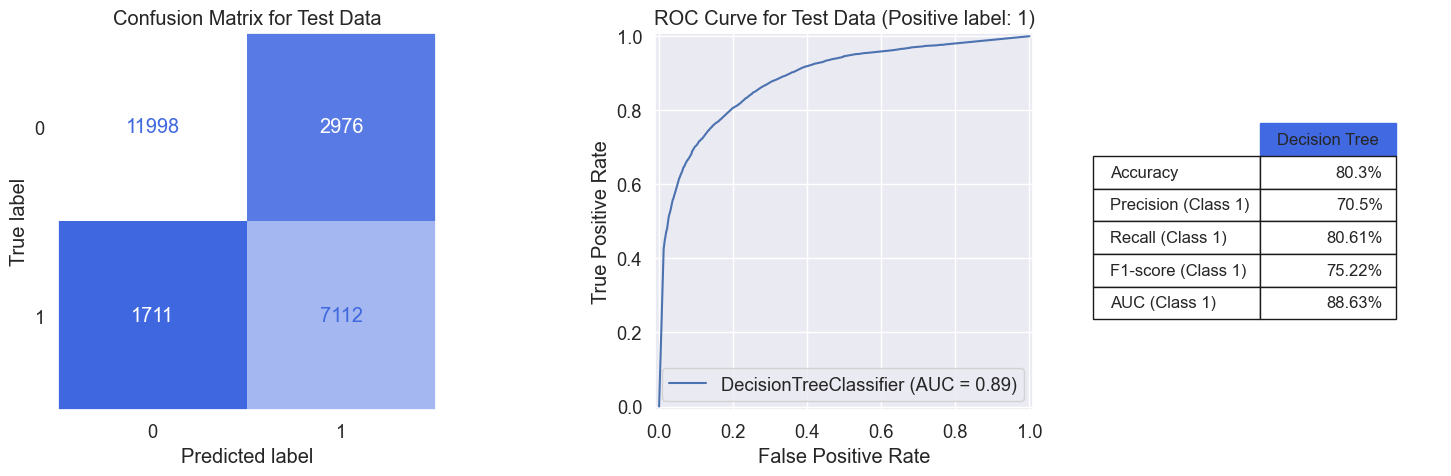

In [46]:
model_evaluation(best_dt, X_train, X_test, y_train, y_test, 'Decision Tree')


✅ Inference:

Our **DT model's performance** on the test data is as follows:

 - The **Accuracy** is 80.3%, which means the model is correctly predicting whether a booking will be canceled or not about 80% of the time.

 - The **Precision** for class 1 (cancellations) is 70.5%, which means that 71% of the bookings that the model predicted as canceled were actually canceled.

 - The **Recall** for class 1 is 80.61%, which means that the model correctly identified 81% of the actual cancellations.

 - The **F1-score** for class 1 is 75.22%, which is the harmonic mean of Precision and Recall.

 - The **AUC** (Area Under the ROC Curve) for class 1 is 88.63%, which means that the model has a good discriminative power between the two classes.

The confusion matrix shows that there are still some False Positives and False Negatives, but the model is doing a relatively good job of minimizing them.

Additionally, the model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is room for improvement.

In [47]:
# Save the final performance of DT classifier
dt_result = metrics_calculator(best_dt, X_test, y_test, 'Decision Tree')
dt_result

,Decision Tree
Accuracy,80.3%
Precision (Class 1),70.5%
Recall (Class 1),80.61%
F1-score (Class 1),75.22%
AUC (Class 1),88.63%


<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
Step 6 | Random Forest Model Building
</p>

Step 6.1 | RF Base Model Definition

First of all, let's define the base RF model:

In [49]:
# Define the base RF model
rf_base = RandomForestClassifier(random_state=0, n_jobs=-1)

Step 6.2 | RF Hyperparameter Tuning

Afterward, I'll set up the hyperparameters grid and utilize the tune_clf_hyperparameters function to pinpoint the optimal hyperparameters for our RF model:

In [50]:
param_grid_rf = {
    'n_estimators': [100, 150],
    'criterion': ['entropy'],
    'max_depth': [16, 18],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'class_weight': [{0: 1, 1: w} for w in [1, 2, 3]]
}

In [51]:
# Using the tune_clf_hyperparameters function to get the best estimator
best_rf, best_rf_hyperparams = tune_clf_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

In [52]:
print('RF Optimal Hyperparameters: \n', best_rf_hyperparams)


RF Optimal Hyperparameters: 
 {'class_weight': {0: 1, 1: 2}, 'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 150}


Step 6.3 | RF Model Evaluation

Let's assess the performance of our trained Random Forest model using the model_evaluation function:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.88      0.89     59897
           1       0.80      0.85      0.83     35291

    accuracy                           0.87     95188
   macro avg       0.86      0.86      0.86     95188
weighted avg       0.87      0.87      0.87     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.86      0.87     14974
           1       0.77      0.79      0.78      8823

    accuracy                           0.84     23797
   macro avg       0.83      0.83      0.83     23797
weighted avg       0.84      0.84      0.84     23797



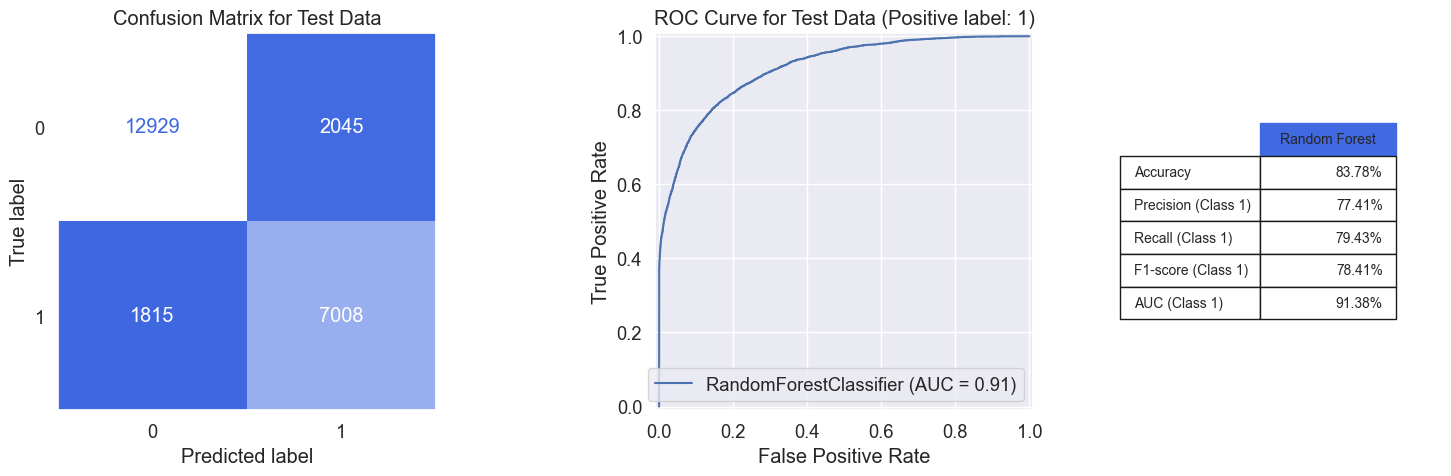

In [55]:
model_evaluation(best_rf, X_train, X_test, y_train, y_test, 'Random Forest')


✅ Inference:

The performance of our Random Forest (RF) model on the test data is as follows:

 - The **Accuracy** is 83.78%, which means the model is correctly predicting whether a booking will be canceled or not about 84% of the time.

 - The **Precision** for class 1 (cancellations) is 77.41%, which means that approximately 78% of the bookings that the model predicted as canceled were actually canceled.

 - The **Recall** for class 1 is 79.43%, which means that the model correctly identified approximately 80% of the actual cancellations.

 - The **F1-score** for class 1 is 78.41%, which is the harmonic mean of Precision and Recall.

 - The **AUC** (Area Under the ROC Curve) for class 1 is 91.38%, which means that the model has a very good discriminative power between the two classes.

The confusion matrix shows that there are some False Positives and False Negatives, but the model is doing a good job of minimizing them.

Additionally, the model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Compared to the Decision Tree (DT) model, the Random Forest (RF) model shows a significant improvement in all the performance metrics, particularly in reducing the number of False Positives. This indicates that the Random Forest model is better at balancing the trade-off between Precision and Recall, leading to a higher F1-score.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations, although there is still room for improvement, particularly in reducing the number of False Negatives.

In [53]:
# Save the final performance of RF classifier
rf_result = metrics_calculator(best_rf, X_test, y_test, 'Random Forest')
rf_result

,Random Forest
Accuracy,83.78%
Precision (Class 1),77.41%
Recall (Class 1),79.43%
F1-score (Class 1),78.41%
AUC (Class 1),91.38%


<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
Step 7 | XGBoost Model Building
</p>

XGBoost, which stands for eXtreme Gradient Boosting, is an efficient and scalable implementation of gradient boosting. It is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. It is particularly popular and effective for classification and regression tasks and has gained reputation for its performance and speed compared to other implementations of gradient boosting. XGBoost is designed to be efficient, flexible and portable.

Step 7.1 | XGBoost Base Model Definition

First of all, let's define the base XGBoost model. We set use_label_encoder=False to avoid a deprecation warning. The eval_metric is set to 'logloss' because it is a more appropriate metric for binary classification tasks and for the slight class imbalance we have in our target variable:

In [34]:
# Define the model
xgb_base = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=0)

Step 7.2 | XGBoost Hyperparameter Tuning

XGBoost has several hyperparameters that need to be tuned to improve the performance of the model. Some of the important hyperparameters are:

 - **n_estimators**: This is the number of boosting rounds or trees to be built. It is usually set to a high number, but XGBoost has an early stopping feature that stops the model building process when no further improvements are observed.

 - **learning_rate**: This is the step size shrinkage used to prevent overfitting. It ranges from 0 to 1.

 - **max_depth**: This is the maximum depth of a tree and can range from 1 to infinity.

 - **subsample**: This is the fraction of observations to be randomly sampled for each tree. It ranges from 0 to 1.
 
 - **colsample_bytree**: This is the fraction of features to be randomly sampled for each tree. It ranges from 0 to 1.

We will tune these hyperparameters using the tune_clf_hyperparameters function, which performs a grid search over the specified parameter grid and returns the best model.

Additionally, XGBoost has a built-in function xgb.cv that can be used to find the optimum number of boosting rounds or n_estimators. This function trains the model several times on different subsets of the data and returns the optimum number of boosting rounds for which the error is minimum. However, since we are tuning n_estimators in the grid search, there is no need to use this function in this case.

In [35]:
# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [250, 350],
    'learning_rate': [0.01, 0.1],
    'max_depth': [7, 8],
    'subsample': [0.7, 0.8],
    'colsample_bytree': [0.8, 0.9],
    'scale_pos_weight': [1, (y_train == 0).sum() / (y_train == 1).sum()]
}

In [36]:
# Call the function for hyperparameter tuning
best_xgb, best_xgb_hyperparams = tune_clf_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

In [37]:
print('XGBoost Optimal Hyperparameters: \n', best_xgb_hyperparams)

XGBoost Optimal Hyperparameters: 
 {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 350, 'scale_pos_weight': 1.697231588790343, 'subsample': 0.8}


Step 7.3 | XGBoost Model Evaluation

Next, let's assess the performance of our optimized XGBoost model by utilizing the model_evaluation function:


	  Classification report for training set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.92      0.92     59897
           1       0.86      0.89      0.87     35291

    accuracy                           0.90     95188
   macro avg       0.90      0.90      0.90     95188
weighted avg       0.91      0.90      0.91     95188


	   Classification report for test set
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.88      0.88     14974
           1       0.79      0.80      0.79      8823

    accuracy                           0.85     23797
   macro avg       0.84      0.84      0.84     23797
weighted avg       0.85      0.85      0.85     23797



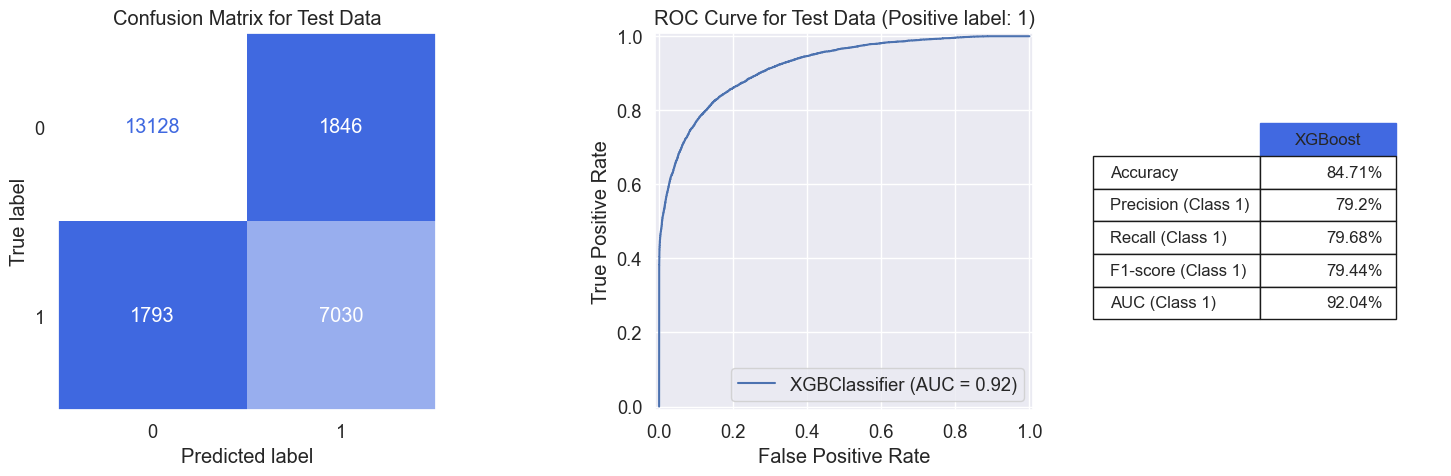

In [56]:
model_evaluation(best_xgb, X_train, X_test, y_train, y_test, 'XGBoost')

✅ Inference:

The performance of our XGBoost (XGB) model on the test data is as follows:

 - The Accuracy is 84.9%, which means the model is correctly predicting whether a booking will be canceled or not about 85% of the time.

 - The Precision for class 1 (cancellations) is 79.4%, which means that approximately 80% of the bookings that the model predicted as canceled were actually canceled.

 -The F1-score for class 1 is 79.6%, which is the harmonic mean of Precision and Recall.

The AUC (Area Under the ROC Curve) for class 1 is 92.1%, which means that the model has a very good discriminative power between the two classes.

The model is not overfitting, as the metric values for the test and train sets are close together, indicating that the model is generalizing well to unseen data.

Compared to the Random Forest (RF) model, the XGBoost (XGB) model shows a slight improvement in all the performance metrics. Although the improvement is not significant, it is still better at balancing the trade-off between Precision and Recall, leading to a higher F1-score. This indicates that the XGBoost model is a better model for predicting cancellations.

Overall, this model is performing well on the test data and seems to be a good model for predicting cancellations.

In [42]:
# Save the final performance of XGBoost classifier
xgb_result = metrics_calculator(best_xgb, X_test, y_test, 'XGBoost')
xgb_result

,XGBoost
Accuracy,84.71%
Precision (Class 1),79.2%
Recall (Class 1),79.68%
F1-score (Class 1),79.44%
AUC (Class 1),92.04%


Step 7.4 | XGBoost Feature Importance 

XGBoost, being a tree-based model, has the inherent ability to compute feature importances. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable. It can aid in feature selection and model optimization:

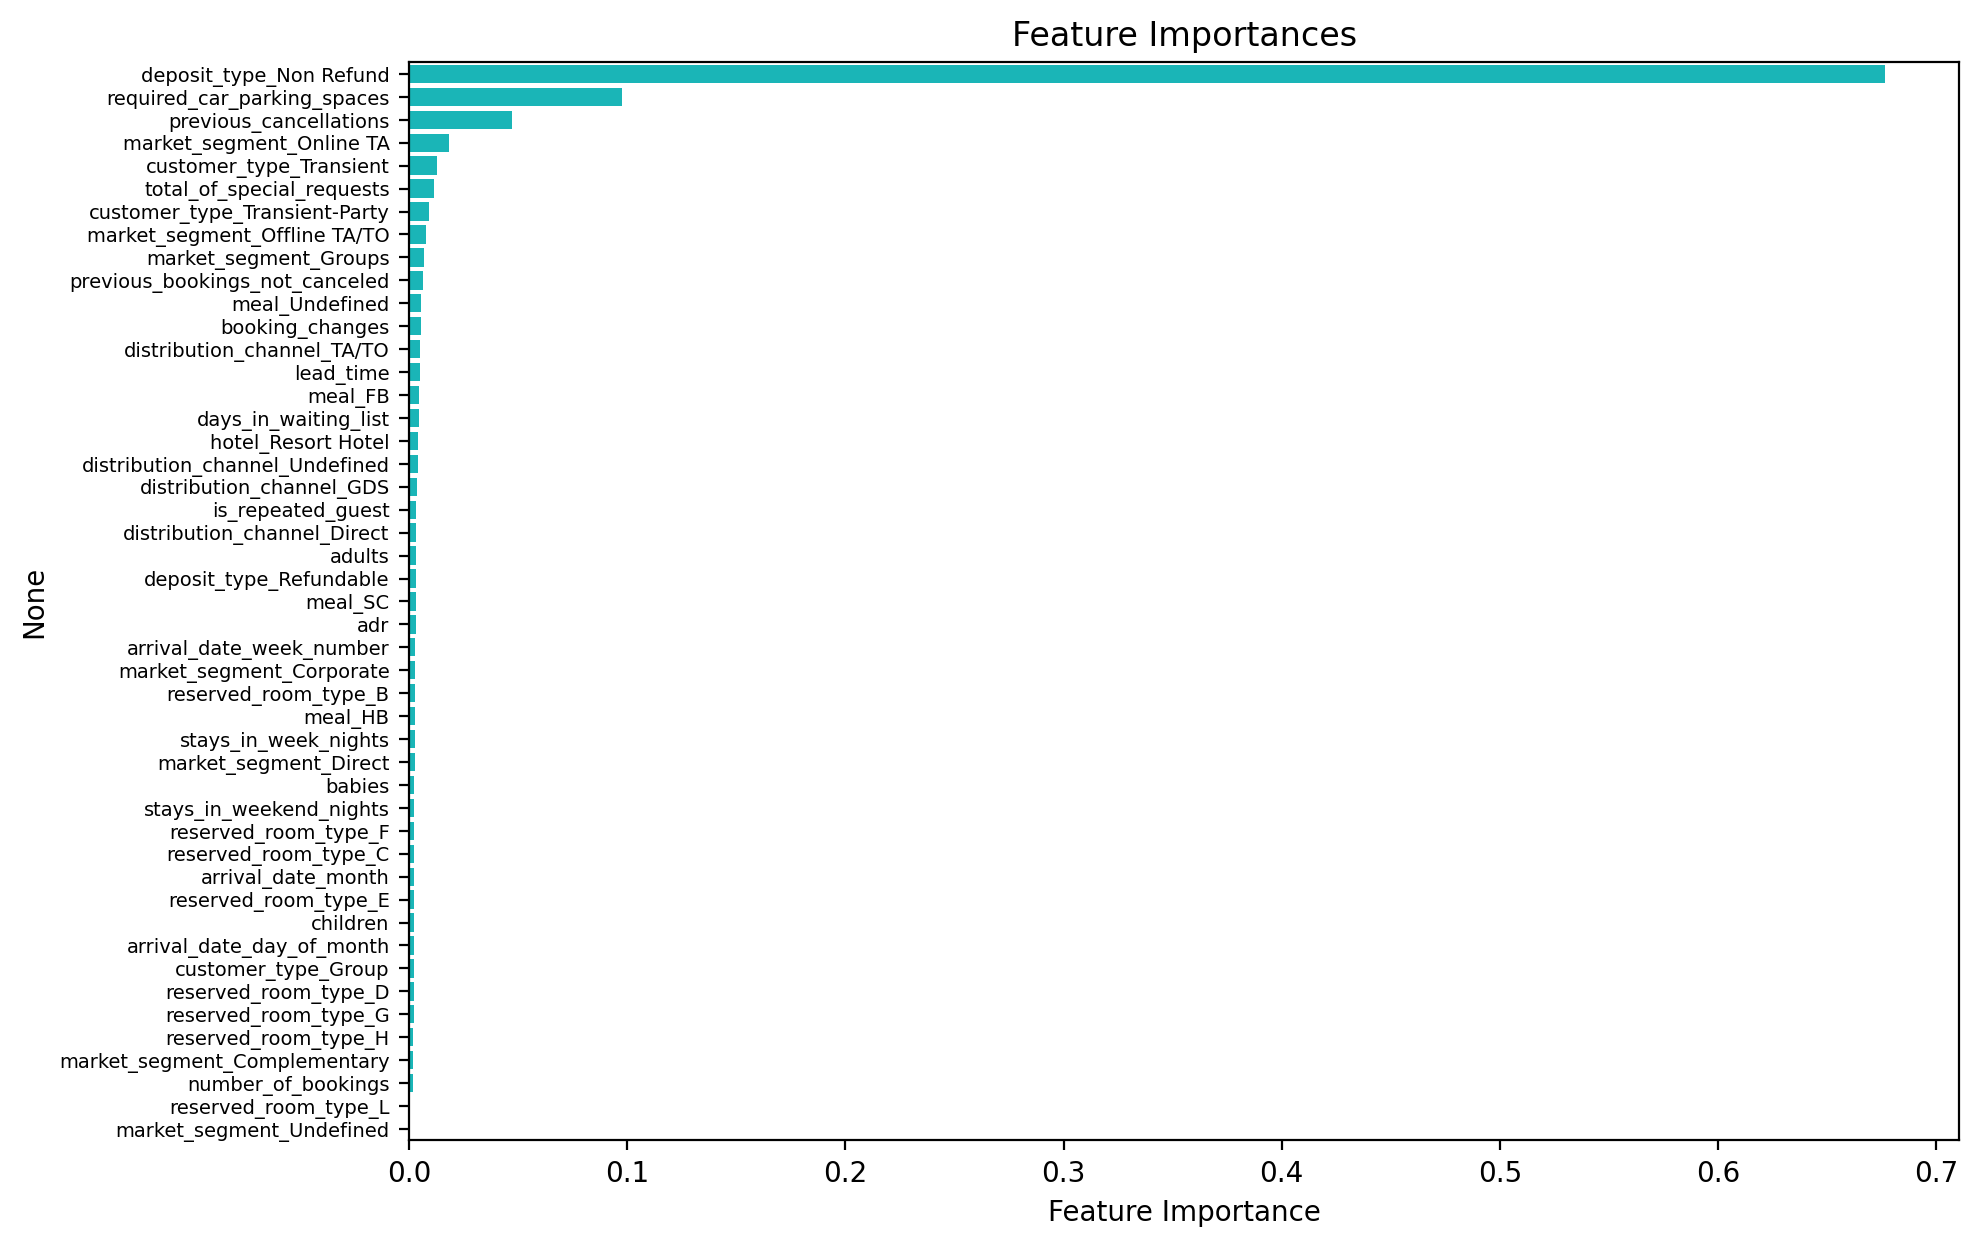

In [43]:
# Compute feature importances
feature_importances = best_xgb.feature_importances_

# Sort the feature importances in descending order and get the indices
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot feature importances
plt.figure(figsize=(10, 7), dpi=200)
sns.barplot(x=feature_importances[sorted_indices], y=X.columns[sorted_indices], color='darkturquoise')
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.yticks(fontsize=7)
plt.show()

Inference:

The `XGBoost` model has found that features related to the `deposit type`, `previous cancellations`, `car parking requirements`, `market segment`, and `customer type` are the most important features for predicting cancellations. This suggests that the financial and logistical aspects, as well as the booking channel and customer category, are particularly important in determining whether a booking will be canceled

<!-- This text will have a red background -->
<p style="background-color:red; color:white; padding:5px; text-align: center">
Step 8 | Conclusion
</p>

As we explained earlier, the most important metric for this project is the F1-score for class '1' (canceled). A high F1-score indicates a balance between minimizing the cost associated with false negatives (overbooking rooms expecting cancellations that do not happen) and false positives (predicting cancellations when the guest actually arrives), which is crucial for the hotel to optimize room availability while minimizing overbooking and unsatisfied customers.

Next, we can check the performance of all previous classifiers based on metrics:

In [60]:
# Concatenate previous classifiers perfermance results into a single dataframe
results = pd.concat([dt_result, rf_result, xgb_result], axis=1).T

# Sort the dataframe in descending order based on F1-score (class 1) values
results.sort_values(by='F1-score (Class 1)', ascending=False, inplace=True)

# Color the F1-score column
results.style.applymap(lambda x: 'background-color: royalblue', subset='F1-score (Class 1)')

,Accuracy,Precision (Class 1),Recall (Class 1),F1-score (Class 1),AUC (Class 1)
XGBoost,84.71%,79.2%,79.68%,79.44%,92.04%
Random Forest,83.78%,77.41%,79.43%,78.41%,91.38%
Decision Tree,80.3%,70.5%,80.61%,75.22%,88.63%


Below, the F1-score for class '1' (canceled) of all previously evaluated classifiers is illustrated in a bar chart:

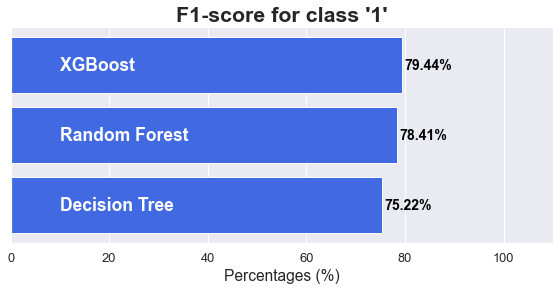

In [61]:
# Prepare values
results.sort_values(by='F1-score (Class 1)', ascending=True, inplace=True)
f1_scores = results['F1-score (Class 1)'].str.strip('%').astype(float)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(10, 4), dpi=70)
ax.barh(results.index, f1_scores, color='royalblue')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(f1_scores, results.index)):
    ax.text(value+0.5, i, f"{value}%", ha='left', va='center', fontweight='bold', color='black')
    ax.text(10, i, name, ha='left', va='center', fontweight='bold', color='white', fontsize=18)

# Remove yticks
ax.set_yticks([])

# Set x-axis limit
ax.set_xlim([0,110])

# Add title and xlabel
plt.title("F1-score for class '1'", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

Among all the tested classifiers, XGBoost had the best performance in predicting hotel booking cancellations:

🏆 Accuracy = 85.04%

🏆 F1-score (Class 1) = 79.85%

🏆 Precision (Class 1) = 79.76%

🏆 Recall (Class 1) = 79.94%

🏆 AUC (Class 1) = 92.17%